In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/home/admn/1nt18is195/Food-Truck-LineReg.csv")

In [48]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [49]:
X = df.iloc[:,0].tolist()

In [50]:
Y = df.iloc[:,1].tolist()

In [51]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)

In [52]:
x_sum = 0
y_sum = 0
x_sum_sq = 0
y_sum_sq = 0
xy_sum = 0
n = len(x)
xy = [None] * n
for i in range(n):
    x_sum += x[i]
    y_sum += y[i]
    x_sum_sq += ( x[i] ** 2 )
    y_sum_sq += ( y[i] ** 2 )
    xy_sum += ( x[i] * y[i] )
    xy[i] = x[i] * y[i]
x_mean = ( x_sum / n )
y_mean = ( y_sum / n )
xy_mean = xy_sum / n

print(xy_mean, np.mean(xy))

65.98055231722078 65.9805523172208


In [53]:
x_std = 0
y_std = 0
for i in range(n):
    x_std += ( ( x[i] - x_mean ) ** 2 )
    y_std += ( ( y[i] - y_mean ) ** 2 )
x_std = ( x_std / n ) ** (1/2)
y_std = ( y_std / n ) ** (1/2)

In [54]:
r = (xy_sum) / (x_sum_sq * y_sum_sq)

In [55]:
m = r * ( y_std / x_std )
m = ( (x_mean * y_mean) - (xy_mean) ) / ( (x_mean ** 2) - (xy_mean) )
#m = ((np.mean(x) * np.mean(y)) - np.mean(x*y)) / ((np.mean(x)**2) - np.mean(x*y))
print(m)

-9.247776885990541


In [56]:
c = y_mean - ( m * x_mean )
print(c)

82.16621246081645


In [57]:
nt = len(x_test)
y_pred = [None] * nt
    
for i in range(nt):
    y_pred[i] = (m * x_test[i] + c)

In [58]:
sse = 0
sst = 0
ssr = 0
y_test_mean = 0
for i in range(nt):
    y_test_mean += y_test[i]
y_test_mean = y_test_mean / nt
for i in range(nt):
    sse += ( ( y_test[i] - y_pred[i] ) ** 2 )
    sst += ( ( y_test[i] - y_test_mean ) ** 2 )
    ssr += ( ( y_pred[i] - y_test_mean ) ** 2 )
mse = sse / n
r_sq = 1 - ( sse / sst )
print(y_test, y_pred)

[3.5129, 4.9981, 6.7318, 5.3048, 0.92695, 3.1386, 1.9869, 0.152, 2.0576, 4.1164, 5.1337, -2.6807, 22.638, 5.1875, 1.0173, 13.501, -0.74279, -1.4211, 17.054, 6.7526] [32.41872148031893, 11.854440018941759, 9.805132661006269, 23.30041347073226, 26.661055591101224, 24.930796535732398, 33.10305696988224, 31.114784939394262, 34.93134246024256, 7.297135569525622, 35.27813409346721, 35.6785628326306, -93.03292064427437, 23.663851102351686, 31.30898825400007, -36.46426943267021, 34.26920163520565, 23.360524020491198, -93.16238952067822, -12.845447265850368]


In [59]:
print("Cost:", sse)
print("SSE:", sse)
print("SSR:", ssr)
print("SST:", sst)
print("R^2:", r_sq)

Cost: 39257.77304440122
SSE: 39257.77304440122
SSR: 29777.734515845485
SST: 748.2130808609201
R^2: -51.468707175274


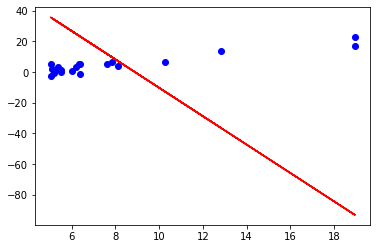

In [60]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test,y_pred, color="red")
plt.show()


In [61]:
from sklearn.linear_model import LinearRegression
import numpy as np
reg = LinearRegression()
x_arr = np.array(x)
y_arr = np.array(y)
reg.fit(x_arr.reshape(-1,1), y_arr)
print(reg.intercept_)
print(reg.coef_)

-3.259733238113532
[1.13318163]


In [63]:
pred_y = reg.predict(np.array(x_test).reshape(-1,1))

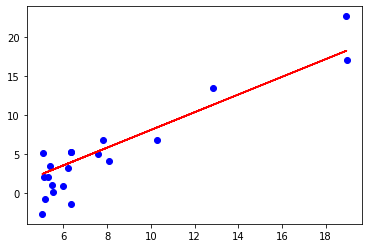

In [64]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test,pred_y, color="red")
plt.show()